In [1]:
#Imported the need libraries
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import cv2
import os

In [2]:
#Preparing the datasets with visualization of Covid, Normal, Viral Pneumonia

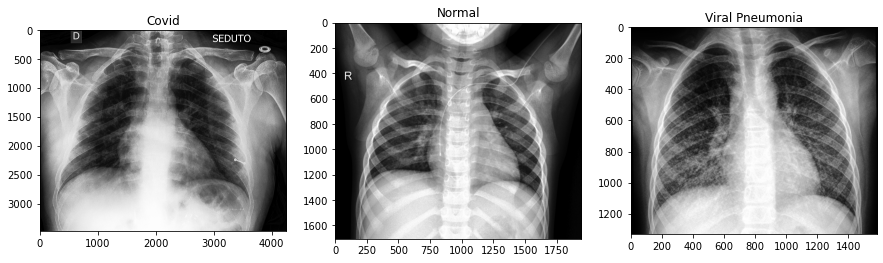

In [3]:
# first let's show the differences between our three classes
plt.figure(figsize = (15, 15))
covid = cv2.imread('C:/Users/User/COE 005/Codes/Homework/Covid19/train/Covid/01.jpeg')
normal = cv2.imread('C:/Users/User/COE 005/Codes/Homework/Covid19/train/Normal/01.jpeg')
valia = cv2.imread('C:/Users/User/COE 005/Codes/Homework/Covid19/train/Viral Pneumonia/01.jpeg')
val=('C:/Users/User/COE 005/Codes/Homework/Covid19/validation')
plt.subplot(1, 3, 1)
plt.imshow(covid)
plt.title('Covid')
plt.subplot(1, 3, 2)
plt.imshow(normal)
plt.title('Normal')
plt.subplot(1, 3, 3)
plt.imshow(valia)
plt.title('Viral Pneumonia')
plt.show()

In [4]:
#Imported the needed libraries
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.applications import MobileNetV2, VGG16, VGG19, ResNet50
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
# number of classes 
dir_list = sorted(os.listdir('C:/Users/User/COE 005/Codes/Homework/Covid19/train'))
class_names_lst = [dir_name for dir_name in dir_list]
class_names_lst

['Covid', 'Normal', 'Viral Pneumonia']

In [6]:
# Loading the data

img_generator = ImageDataGenerator(
    rescale = 1. / 224, 
    horizontal_flip = True,
    rotation_range = 20,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split=0.1
)
train_data = img_generator.flow_from_directory(
    'C:/Users/User/COE 005/Codes/Homework/Covid19/train',
    target_size = (224,224),
    color_mode = 'rgb',
    classes = class_names_lst,
    batch_size =10,
    class_mode = 'categorical',
    subset = 'training'
)
valid_data = img_generator.flow_from_directory(
    'C:/Users/User/COE 005/Codes/Homework/Covid19/validation',
    target_size = (224,224),
    color_mode = 'rgb',
    classes = class_names_lst,
    batch_size =10,
    class_mode = 'categorical',
    subset = 'validation'
)
test_generator = ImageDataGenerator(
    rescale = 1. / 224
)
test_data = test_generator.flow_from_directory(
    'C:/Users/User/COE 005/Codes/Homework/Covid19/test',
    target_size = (224,224),
    color_mode = 'rgb',
    classes = class_names_lst,
    batch_size =10,
    class_mode = 'categorical',
    shuffle = False

)

Found 225 images belonging to 3 classes.
Found 0 images belonging to 3 classes.
Found 65 images belonging to 3 classes.


In [7]:
base_model = ResNet50(input_shape=(224, 224, 3),
                      include_top=False,
                      weights="imagenet")
base2_model = MobileNetV2(input_shape=(224, 224, 3),
                         include_top=False,
                         weights="imagenet")
base3_model = VGG19(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False
base2_model.trainable = False
base3_model.trainable = True


In [8]:
len(base3_model.layers)

22

In [9]:
fine_tune = 20
for layer in base_model.layers[:fine_tune]:
    layer.trainable = False

In [10]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=3, activation='softmax')
    ])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 3)                 6

In [11]:
#Modelling Compile
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
    loss = 'categorical_crossentropy',
    metrics = 'accuracy')
batch_size=10

In [12]:
#Fitting the model

history = model.fit(
    x = train_data, steps_per_epoch=train_data.samples // batch_size, epochs=24, 
    validation_data=test_data, 
    validation_steps=test_data.samples // batch_size,verbose=2)

Epoch 1/24
22/22 - 11s - loss: 0.8944 - accuracy: 0.5953 - val_loss: 0.7325 - val_accuracy: 0.6500 - 11s/epoch - 501ms/step
Epoch 2/24
22/22 - 10s - loss: 0.5642 - accuracy: 0.7953 - val_loss: 0.6300 - val_accuracy: 0.6833 - 10s/epoch - 440ms/step
Epoch 3/24
22/22 - 9s - loss: 0.4274 - accuracy: 0.8512 - val_loss: 0.6758 - val_accuracy: 0.6500 - 9s/epoch - 432ms/step
Epoch 4/24
22/22 - 10s - loss: 0.3083 - accuracy: 0.9023 - val_loss: 0.5276 - val_accuracy: 0.7833 - 10s/epoch - 439ms/step
Epoch 5/24
22/22 - 10s - loss: 0.3366 - accuracy: 0.8512 - val_loss: 0.4701 - val_accuracy: 0.8667 - 10s/epoch - 441ms/step
Epoch 6/24
22/22 - 10s - loss: 0.2414 - accuracy: 0.9209 - val_loss: 0.3886 - val_accuracy: 0.8000 - 10s/epoch - 450ms/step
Epoch 7/24
22/22 - 10s - loss: 0.2567 - accuracy: 0.9070 - val_loss: 0.3644 - val_accuracy: 0.8333 - 10s/epoch - 443ms/step
Epoch 8/24
22/22 - 10s - loss: 0.2202 - accuracy: 0.9209 - val_loss: 0.4318 - val_accuracy: 0.7500 - 10s/epoch - 450ms/step
Epoch 9/24

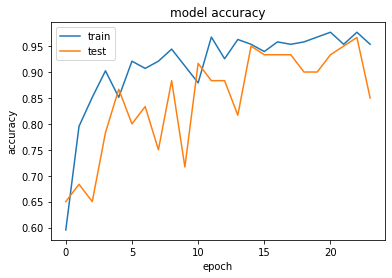

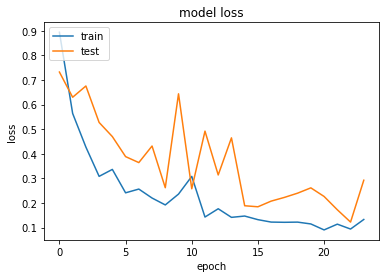

In [13]:
#Plotting the accuracy and val accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])


training_accuracy 0.9534883499145508
validation_accuracy 0.8500000238418579


In [15]:
y_hat = model.predict(test_data)

7/7 [==============================] - 1s 155ms/step


In [16]:
y_hat_lst = []
for idx in range(y_hat.shape[0]):
    y_hat_lst.append(np.argmax(y_hat[idx]))

In [17]:
y_hat_cat = []
for val in y_hat_lst:
    y_hat_cat.append(class_names_lst[val])

In [18]:
true_y_cat = []
for val in test_data.classes:
    true_y_cat.append(class_names_lst[val])

In [19]:
for i, j in zip(true_y_cat, y_hat_cat):
    print(i, '|', j)

Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Viral Pneumonia
Covid | Viral Pneumonia
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Viral Pneumonia
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Viral Pneumonia
Normal | Normal
Normal | Viral Pneumonia
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Viral Pneumonia
Normal | Viral Pneumonia
Normal | Viral Pneumonia
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Viral Pneumonia
Normal | Normal
Viral Pneumonia | Viral Pneumonia
Viral Pneumonia | Viral Pneumonia
Viral Pneumonia | Viral Pneumonia
Viral Pneumonia | Viral Pneumonia
Viral Pneumonia | Viral Pneumonia
Viral Pneumonia | Viral Pneumonia
Viral Pneumonia | Viral Pneumonia
Viral Pn